## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas_datareader.data as pdr
import datetime
import yfinance as yfin

## Load Data

In [2]:
# S&P top 25 holdings as of 03/24/23
companies_dict = {
    'Apple': 'AAPL',
    'Microsoft': 'MSFT',
    'Amazon': 'AMZN',
    'NVIDIA': 'NVDA',
    'Alphabet': 'GOOGL',
    'Alphabet': 'GOOG',
    'PayPal': 'PYPL',
    'Tesla': 'TSLA',
    'Meta': 'META',
    'UnitedHealth': 'UNH',
    'Exxon Mobil': 'XOM',
    'Johnson & Johnson': 'JNJ',
    'JPMorgan': 'JPM',
    'Visa': 'V',
    'Proctor & Gamble': 'PG',
    'Mastercard': 'MA',
    'Home Depot': 'HD',
    'Chevron': 'CVX',
    'AbbVie': 'ABBV',
    'Merck': 'MRK',
    'Broadcom': 'AVGO',
    'Eli Lilly': 'LLY',
    'PepsiCo': 'PEP',
    'Coca Cola': 'KO', 
    'Pfizer': 'PFE'}

companies = sorted(companies_dict.items(), key=lambda x: x[1])

In [3]:
# Data source
data_source = 'yahoo'

# Define start and end dates
start = '2020-01-01'
end = '2023-03-24'

# Use datareader to load desired data list
yfin.pdr_override()
panel_data = pdr.DataReader(list(companies_dict.values()), start, end)

print(panel_data.axes)

[*********************100%***********************]  24 of 24 completed
[DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2023-03-10', '2023-03-13', '2023-03-14', '2023-03-15',
               '2023-03-16', '2023-03-17', '2023-03-20', '2023-03-21',
               '2023-03-22', '2023-03-23'],
              dtype='datetime64[ns]', name='Date', length=812, freq=None), MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'ABBV'),
            ('Adj Close', 'AMZN'),
            ('Adj Close', 'AVGO'),
            ('Adj Close',  'CVX'),
            ('Adj Close', 'GOOG'),
            ('Adj Close',   'HD'),
            ('Adj Close',  'JNJ'),
            ('Adj Close',  'JPM'),
            ('Adj Close',   'KO'),
            ...
            (   'Volume', 'MSFT'),
            (   'Volume', 'NVDA'),
            (   'Volume',  

In [4]:
# Find stock open and close values
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(len(stock_close))

812


In [5]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

# Create movement dataset blueprint
movements = np.zeros([row, col])

for i in range(0, row):
    movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])
    
for i in range(0, len(companies)):
    print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))

Company: Apple, Change: 95.11970138549805
Company: AbbVie, Change: 77.30003356933594
Company: Amazon, Change: -58.36152648925781
Company: Broadcom, Change: 70.99017333984375
Company: Chevron, Change: 16.79015350341797
Company: Alphabet, Change: 56.7867317199707
Company: Home Depot, Change: 138.6497344970703
Company: Johnson & Johnson, Change: 5.679901123046875
Company: JPMorgan, Change: -27.17022705078125
Company: Coca Cola, Change: -16.340038299560547
Company: Eli Lilly, Change: 151.78013610839844
Company: Mastercard, Change: -1.5192718505859375
Company: Meta, Change: 100.78018188476562
Company: Merck, Change: 9.040046691894531
Company: Microsoft, Change: 76.17997741699219
Company: NVIDIA, Change: 110.23513412475586
Company: PepsiCo, Change: 2.7500152587890625
Company: Pfizer, Change: -1.9523353576660156
Company: Proctor & Gamble, Change: 54.35011291503906
Company: PayPal, Change: -128.13279724121094
Company: Tesla, Change: -107.14127922058105
Company: UnitedHealth, Change: 61.9100799

## Exploratory Data Analysis

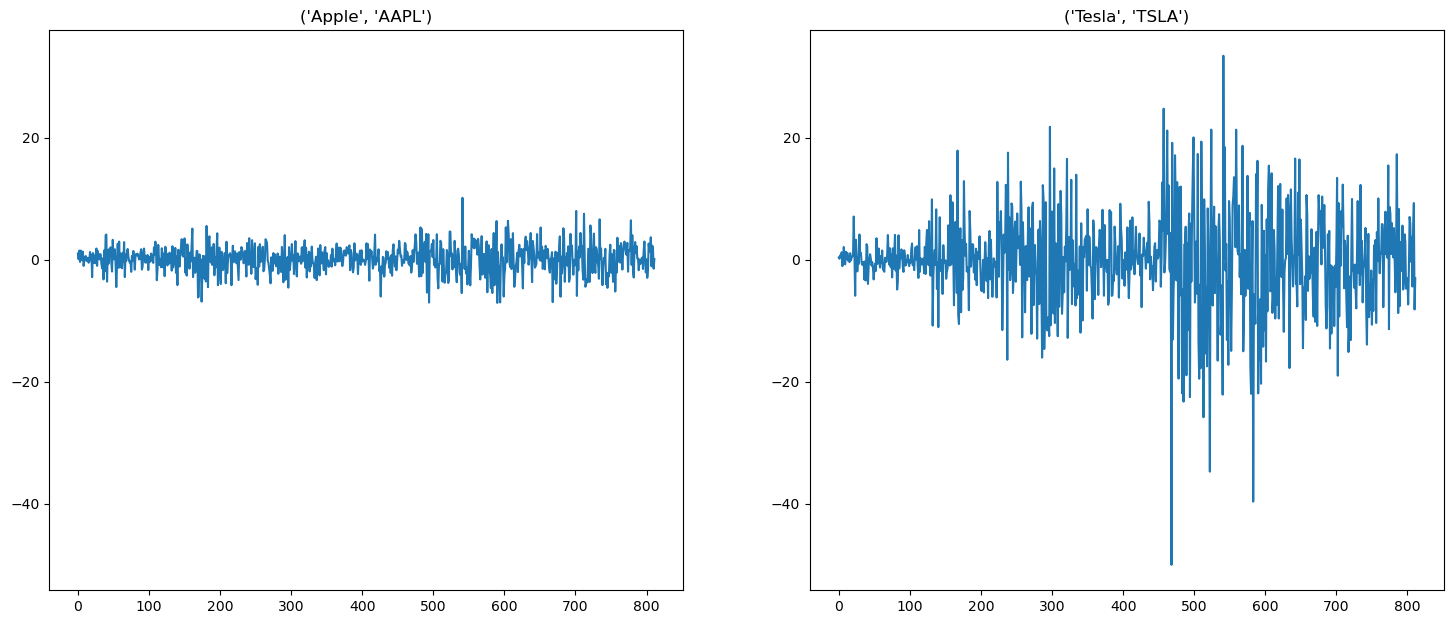

In [6]:
# Visualize movements of two tickers
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[20][:])
plt.title(companies[20])
plt.show();

In [7]:
# Perform normalization
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
norm_movements = normalizer.fit_transform(movements)

print(norm_movements.max())
print(norm_movements.min())
print(norm_movements.mean())

0.2147166311326866
-0.2788197165201336
0.0004423870007957152


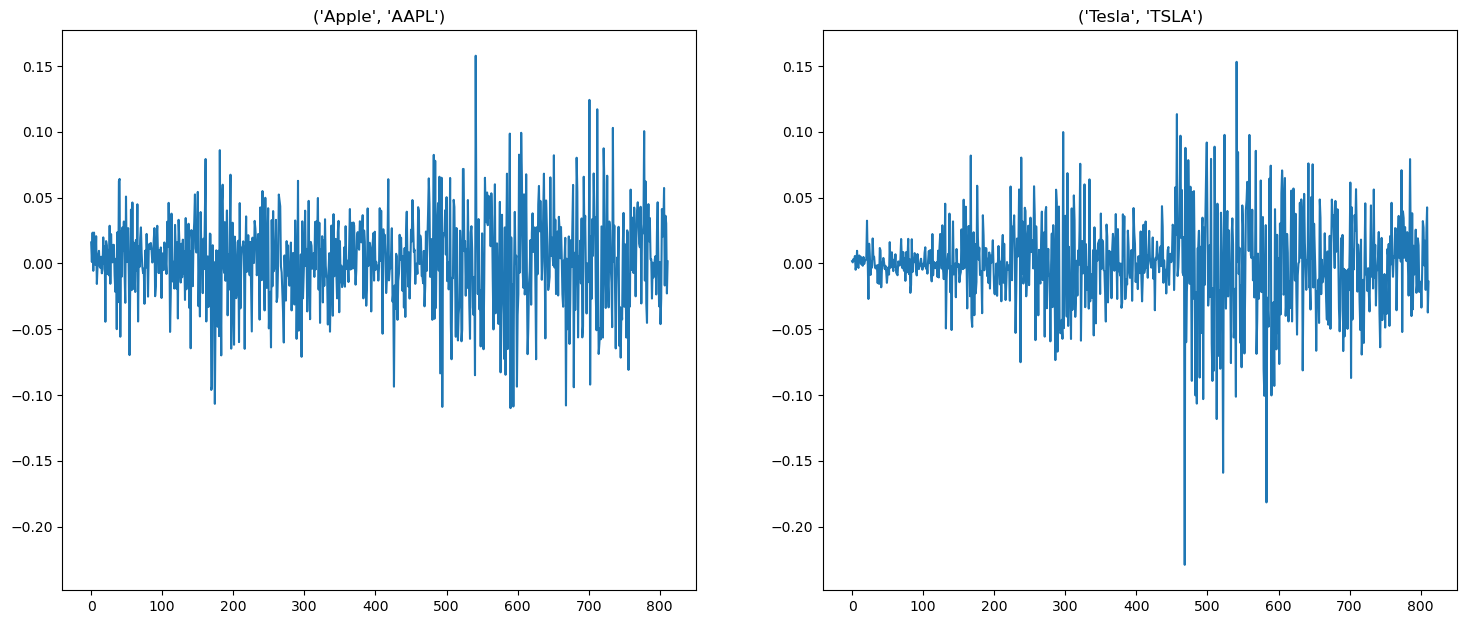

In [8]:
# Plot normalized data
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(norm_movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(norm_movements[20][:])
plt.title(companies[20])
plt.show();

## K-Means Clustering

In [9]:
# Import dependencies
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# Define normalizer
normalizer = Normalizer()

# Create K-means model with 10 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000)

# Make pipeline chaning normalizer and K-means
pipeline = make_pipeline(normalizer, kmeans)

In [10]:
# Fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=10))])

In [11]:
# Evaluate model 
print(kmeans.inertia_)

# Inertia = how close clusters are together
# Lower inertia score is better

5.290291009811996


In [13]:
# Predict cluster labels
labels = pipeline.predict(movements)

# Create dataframe
df = pd.DataFrame({'labels': labels, 'companies': companies})

print(df.sort_values('labels'))

    labels                 companies
20       0             (Tesla, TSLA)
3        0          (Broadcom, AVGO)
6        0          (Home Depot, HD)
15       0            (NVIDIA, NVDA)
18       1    (Proctor & Gamble, PG)
16       1            (PepsiCo, PEP)
9        1           (Coca Cola, KO)
23       2        (Exxon Mobil, XOM)
4        2            (Chevron, CVX)
1        3            (AbbVie, ABBV)
7        3  (Johnson & Johnson, JNJ)
10       3          (Eli Lilly, LLY)
13       3              (Merck, MRK)
14       4         (Microsoft, MSFT)
0        4             (Apple, AAPL)
5        4          (Alphabet, GOOG)
2        4            (Amazon, AMZN)
12       4              (Meta, META)
19       5            (PayPal, PYPL)
8        6           (JPMorgan, JPM)
21       7       (UnitedHealth, UNH)
22       8                 (Visa, V)
11       8          (Mastercard, MA)
17       9             (Pfizer, PFE)


## Principal Component Analysis

In [26]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components = 2).fit_transform(norm_movements)

# Perform K-means on reduced data
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# Create dataframe
df_reduced = pd.DataFrame({'labels': labels, 'companies': companies})

print(df_reduced.sort_values('labels'))

    labels                 companies
16       0            (PepsiCo, PEP)
9        0           (Coca Cola, KO)
0        1             (Apple, AAPL)
2        1            (Amazon, AMZN)
14       1         (Microsoft, MSFT)
12       1              (Meta, META)
5        1          (Alphabet, GOOG)
23       2        (Exxon Mobil, XOM)
4        2            (Chevron, CVX)
6        3          (Home Depot, HD)
22       3                 (Visa, V)
11       3          (Mastercard, MA)
8        4           (JPMorgan, JPM)
7        5  (Johnson & Johnson, JNJ)
3        6          (Broadcom, AVGO)
15       6            (NVIDIA, NVDA)
19       6            (PayPal, PYPL)
20       6             (Tesla, TSLA)
10       7          (Eli Lilly, LLY)
1        7            (AbbVie, ABBV)
21       7       (UnitedHealth, UNH)
18       8    (Proctor & Gamble, PG)
13       9              (Merck, MRK)
17       9             (Pfizer, PFE)


<Figure size 640x480 with 0 Axes>

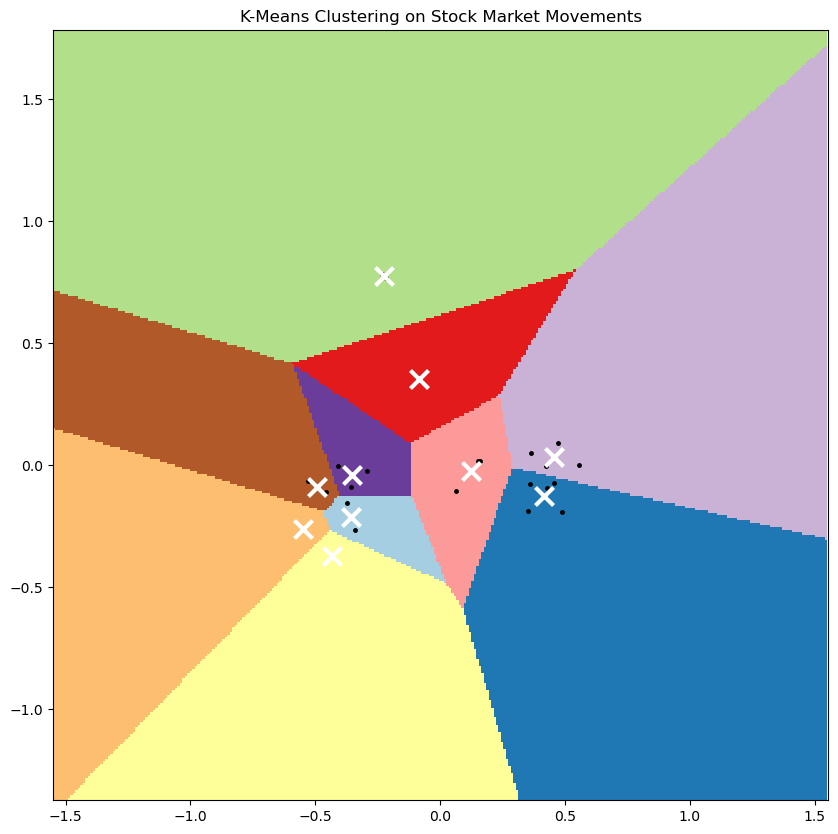

In [28]:
# Define step size of mesh
h = 0.01

# Plot decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy, = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Labels for each point in grid using trained label
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result in color plot
Z = Z.reshape(xx.shape)

# Define color plot
cmap = plt.cm.Paired

# Plot figure
plt.clf()
plt.figure(figsize=(10, 10))
plt.imshow(Z, interpolation='nearest',
          extent = (xx.min(), xx.max(),
                   yy.min(), yy.max()),
          cmap = cmap,
          aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)

# Plot centroid of each cluster as white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidth=3,
            color='white', zorder=10)

# Graph labels
plt.title('K-Means Clustering on Stock Market Movements')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()